In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pip install opencv-python

(261, 280, 3)


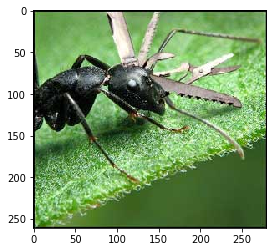

In [0]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('/content/gdrive/My Drive/前処理入門/data/ants/swiss-army-ant.jpg')
print(img.shape)#画像の縦横サイズ、カラーチャンネル数を確認
# print(img)
img2=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
# print(img[:1])

In [0]:
print(len(img))#配列全体のサイズ->画像の縦のサイズと一致
print(len(img[0]))#一行目の配列のサイズ->画像の横サイズと一致
print(len(img[0][0]))#一行目一列目の配列のサイズ->画像のカラーチャンネル数と一致


261
280
3


In [0]:
import pandas as pd

b,g,r=cv2.split(img)

b_df=pd.DataFrame(b)
print(b_df.shape)
b_df.head()

(261, 280)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,60,28,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,0,0,0,1,1,2,3,3,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,5,3,2,0,0,6,0,0,0,4,13,17
1,28,16,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,0,0,0,0,2,12,15,19,4
2,18,24,92,81,83,69,86,89,89,85,83,82,84,84,82,83,90,92,93,92,93,92,93,92,100,99,101,100,102,102,103,103,101,99,99,98,97,96,96,96,...,95,95,95,96,98,101,104,106,105,105,104,103,102,101,100,95,90,85,86,85,85,86,90,90,105,107,111,113,117,117,116,113,119,115,107,120,125,127,99,11
3,0,0,82,77,74,60,75,78,72,71,66,65,69,68,65,67,72,74,75,74,75,74,75,74,88,87,89,88,90,90,91,91,90,88,88,87,86,85,85,85,...,83,81,83,82,87,89,94,94,93,91,92,88,89,86,87,82,75,72,69,67,68,72,76,80,94,98,101,106,107,108,109,108,107,97,96,110,116,130,92,0
4,0,0,84,75,66,55,67,69,70,68,66,65,68,67,63,64,68,70,72,70,72,70,72,70,74,73,75,74,77,75,78,76,78,78,77,77,76,75,75,74,...,84,79,81,80,83,84,89,88,84,82,83,80,81,79,80,77,76,72,68,66,67,73,78,83,82,85,88,92,94,94,96,94,93,87,90,102,109,135,105,0


In [0]:
g_df=pd.DataFrame(g)
print(g_df.shape)
r_df=pd.DataFrame(r)
print(r_df.shape)


(261, 280)
(261, 280)


(261, 280)
img: 261
gray: 261


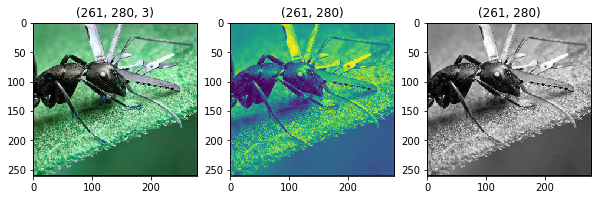

In [0]:
#輝度情報->グレースケール 0～255

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gray.shape)
# plt.imshow(img)

# plt.imshow(gray)#輝度情報による可視化
# plt.imshow(gray,cmap='gray')#輝度情報をグレーで表現

fig, (axL,axM ,axR) = plt.subplots(ncols=3, figsize=(10,4))
print("img:",len(img))
print("gray:",len(gray))

axL.imshow(img)
axL.set_title(img.shape)
axM.imshow(gray)
axM.set_title(gray.shape)
axR.imshow(gray,cmap='gray')
axR.set_title(gray.shape)
#grayは色情報が落ちているので、shapeを見たときcolor-channel配列が落ちている
fig.show()

In [0]:
#grayをpd
gr_df=pd.DataFrame(gray)
print(gr_df.shape)
gr_df.head()

(261, 280)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,19,6,8,3,8,6,9,3,5,5,5,5,4,3,2,1,2,2,2,2,2,2,2,2,0,0,0,1,1,2,3,3,3,3,2,2,2,1,1,1,...,3,3,2,2,2,2,3,4,2,2,2,2,2,2,2,2,2,2,4,5,4,2,2,2,1,2,3,3,4,2,1,1,2,13,4,4,2,2,2,3
1,6,4,30,14,21,11,12,6,12,12,11,12,11,9,8,8,9,9,9,9,9,9,9,9,6,6,6,6,7,8,8,9,10,10,9,8,8,8,7,7,...,8,8,7,7,8,9,11,12,11,10,10,10,9,9,8,8,7,8,9,9,9,8,7,6,8,9,10,11,12,11,10,9,6,12,9,18,24,22,17,0
2,14,33,127,131,138,122,130,130,130,129,129,128,127,127,126,126,127,127,127,127,127,127,127,127,134,134,135,135,136,137,137,138,140,140,140,139,138,137,137,137,...,123,123,123,124,126,129,132,134,133,133,132,131,130,129,128,127,125,124,123,122,122,123,125,125,139,141,143,145,147,147,146,145,153,150,144,155,157,154,117,27
3,3,16,132,143,145,129,135,135,129,129,128,127,127,126,125,125,125,125,125,125,125,125,125,125,138,138,139,139,140,141,141,142,145,145,145,144,143,142,142,142,...,122,122,122,123,126,130,133,135,132,132,131,129,128,127,126,125,125,123,120,118,119,122,126,128,142,144,147,150,151,152,152,152,153,145,144,158,159,167,122,6
4,6,22,139,146,144,131,133,131,134,134,133,132,132,131,130,130,130,130,130,130,130,130,130,130,132,133,133,134,135,135,136,136,140,140,139,139,138,137,137,136,...,130,129,129,130,131,134,137,138,132,132,131,130,129,129,128,128,131,129,125,123,124,128,133,136,135,136,139,142,144,144,144,144,143,138,141,153,155,176,139,14


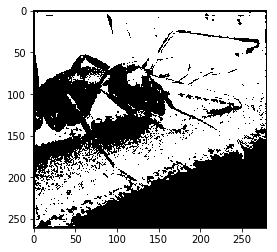

In [0]:
#2値化画像
#閾値よりピクセルの値が大きければ白（255）小さければ（0）を割り当てるような白黒画像生成
                      #2値化した画像、閾値、引数の最大値
ret,bin_img=cv2.threshold(gray,122,255,cv2.THRESH_BINARY)

plt.imshow(bin_img,cmap='gray')
plt.show()

In [0]:
bin_df=pd.DataFrame(bin_img)
print(bin_df.shape)
bin_df.head()

(261, 280)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,255,255,255,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,0,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,0,0
3,0,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,0,0,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,0,0,0,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,0,0
4,0,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,0


In [0]:
#データセットの作成
#グレースケール

import os
import cv2
import numpy as np

dirs=['ants','bees']
pixels=[]
labels=[]

for i,d in enumerate(dirs):
  files=os.listdir('/content/gdrive/My Drive/前処理入門/data/'+d)

  for f in files:
    img=cv2.imread('/content/gdrive/My Drive/前処理入門/data/'+d+'/'+f,0)#グレーで保存
    img=cv2.resize(img,(128,128))#サイズ変更
    img=np.array(img).flatten().tolist()#二次元配列を一次元配列に変更
    pixels.append(img)

    labels.append(i)

In [0]:
import pandas as pd
pixels_df=pd.DataFrame(pixels)
pixels_df=pixels_df/255#正規化？

labels_df=pd.DataFrame(labels)
labels_df=labels_df.rename(columns={0:'label'})

img_set=pd.concat([pixels_df,labels_df],axis=1)
img_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16345,16346,16347,16348,16349,16350,16351,16352,16353,16354,16355,16356,16357,16358,16359,16360,16361,16362,16363,16364,16365,16366,16367,16368,16369,16370,16371,16372,16373,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,0.549020,0.552941,0.545098,0.552941,0.545098,0.556863,0.556863,0.556863,0.552941,0.556863,0.549020,0.560784,0.552941,0.556863,0.556863,0.556863,0.556863,0.552941,0.556863,0.549020,0.568627,0.552941,0.560784,0.560784,0.564706,0.556863,0.564706,0.560784,0.560784,0.556863,0.552941,0.564706,0.552941,0.556863,0.556863,0.552941,0.556863,0.556863,0.552941,0.560784,...,0.572549,0.580392,0.576471,0.580392,0.576471,0.584314,0.576471,0.580392,0.588235,0.576471,0.580392,0.576471,0.584314,0.521569,0.290196,0.286275,0.298039,0.294118,0.290196,0.294118,0.286275,0.286275,0.282353,0.294118,0.286275,0.294118,0.298039,0.278431,0.286275,0.282353,0.294118,0.282353,0.286275,0.274510,0.294118,0.286275,0.286275,0.278431,0.360784,0
1,0.513725,0.501961,0.533333,0.533333,0.537255,0.529412,0.525490,0.517647,0.533333,0.545098,0.525490,0.509804,0.564706,0.537255,0.560784,0.537255,0.541176,0.545098,0.564706,0.560784,0.568627,0.545098,0.545098,0.580392,0.572549,0.560784,0.568627,0.556863,0.549020,0.564706,0.556863,0.564706,0.560784,0.556863,0.564706,0.568627,0.572549,0.564706,0.545098,0.572549,...,0.254902,0.243137,0.250980,0.250980,0.258824,0.243137,0.274510,0.274510,0.231373,0.215686,0.235294,0.282353,0.235294,0.278431,0.266667,0.231373,0.274510,0.247059,0.262745,0.274510,0.270588,0.223529,0.235294,0.231373,0.274510,0.266667,0.262745,0.247059,0.243137,0.207843,0.254902,0.254902,0.258824,0.250980,0.250980,0.231373,0.203922,0.270588,0.254902,0
2,0.384314,0.392157,0.392157,0.396078,0.396078,0.392157,0.380392,0.388235,0.376471,0.392157,0.396078,0.392157,0.396078,0.392157,0.400000,0.376471,0.380392,0.380392,0.384314,0.384314,0.380392,0.368627,0.372549,0.380392,0.384314,0.380392,0.388235,0.372549,0.376471,0.388235,0.396078,0.376471,0.380392,0.384314,0.380392,0.384314,0.380392,0.388235,0.384314,0.376471,...,0.384314,0.396078,0.388235,0.396078,0.400000,0.403922,0.396078,0.407843,0.415686,0.415686,0.403922,0.419608,0.415686,0.415686,0.415686,0.423529,0.415686,0.411765,0.423529,0.415686,0.423529,0.400000,0.431373,0.407843,0.396078,0.356863,0.313725,0.270588,0.227451,0.203922,0.227451,0.156863,0.066667,0.023529,0.035294,0.047059,0.015686,0.007843,0.007843,0
3,0.941176,0.917647,0.945098,0.933333,0.952941,0.886275,0.941176,0.788235,0.882353,0.933333,0.882353,0.921569,0.988235,0.835294,0.984314,0.956863,0.968627,0.976471,0.964706,0.968627,0.956863,0.952941,0.996078,0.992157,0.992157,0.992157,0.976471,0.960784,0.921569,0.956863,0.988235,0.988235,0.964706,0.996078,0.984314,0.992157,0.992157,0.992157,0.992157,0.988235,...,0.768627,0.921569,0.784314,0.898039,0.933333,0.890196,0.956863,0.843137,0.898039,0.717647,0.909804,0.839216,0.792157,0.811765,0.815686,0.721569,0.835294,0.803922,0.780392,0.784314,0.705882,0.835294,0.843137,0.925490,0.749020,0.839216,0.819608,0.639216,0.721569,0.760784,0.717647,0.552941,0.729412,0.686275,0.239216,0.352941,0.443137,0.462745,0.596078,0
4,0.756863,0.831373,0.894118,0.815686,0.862745,0.866667,0.737255,0.772549,0.768627,0.219608,0.211765,0.431373,0.701961,0.862745,0.823529,0.913725,0.925490,0.937255,0.890196,0.862745,0.905882,0.847059,0.878431,0.909804,0.905882,0.807843,0.819608,0.800000,0.792157,0.486275,0.513725,0.396078,0.474510,0.294118,0.709804,0.850980,0.760784,0.784314,0.874510,0.592157,...,0.882353,0.921569,0.866667,0.898039,0.898039,0.894118,0.807843,0.901961,0.952941,0.909804,0.882353,0.921569,0.917647,0.905882,0.866667,0.796078,0.882353,0.862745,0.803922,0.784314,0.737255,0.741176,0.764706,0.811765,0.819608,0.843137,0.882353,0.913725,0.913725,0.937255,0.866667,0.890196,0.933333,0.905882,0.882353,0.921569,0.945098,0.858824,0.823529,0


In [0]:
img_set.shape

(397, 16385)

In [0]:
#データセットの作成
#カラースケール

import os
import cv2
import numpy as np

dirs=['ants','bees']
pixels=[]
labels=[]

for i,d in enumerate(dirs):
  files=os.listdir('/content/gdrive/My Drive/前処理入門/data/'+d)

  for f in files:
    img=cv2.imread('/content/gdrive/My Drive/前処理入門/data/'+d+'/'+f,1)#カラーで保存
    img=cv2.resize(img,(128,128))#サイズ変更
    img=np.array(img).flatten().tolist()#二次元配列を一次元配列に変更
    pixels.append(img)

    labels.append(i)

import pandas as pd
pixels_df_c=pd.DataFrame(pixels)
pixels_df_c=pixels_df/255#正規化？

labels_df_c=pd.DataFrame(labels)
labels_df_c=labels_df.rename(columns={0:'label'})

img_set_c=pd.concat([pixels_df,labels_df],axis=1)
img_set_c.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16345,16346,16347,16348,16349,16350,16351,16352,16353,16354,16355,16356,16357,16358,16359,16360,16361,16362,16363,16364,16365,16366,16367,16368,16369,16370,16371,16372,16373,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,0.549020,0.552941,0.545098,0.552941,0.545098,0.556863,0.556863,0.556863,0.552941,0.556863,0.549020,0.560784,0.552941,0.556863,0.556863,0.556863,0.556863,0.552941,0.556863,0.549020,0.568627,0.552941,0.560784,0.560784,0.564706,0.556863,0.564706,0.560784,0.560784,0.556863,0.552941,0.564706,0.552941,0.556863,0.556863,0.552941,0.556863,0.556863,0.552941,0.560784,...,0.572549,0.580392,0.576471,0.580392,0.576471,0.584314,0.576471,0.580392,0.588235,0.576471,0.580392,0.576471,0.584314,0.521569,0.290196,0.286275,0.298039,0.294118,0.290196,0.294118,0.286275,0.286275,0.282353,0.294118,0.286275,0.294118,0.298039,0.278431,0.286275,0.282353,0.294118,0.282353,0.286275,0.274510,0.294118,0.286275,0.286275,0.278431,0.360784,0
1,0.513725,0.501961,0.533333,0.533333,0.537255,0.529412,0.525490,0.517647,0.533333,0.545098,0.525490,0.509804,0.564706,0.537255,0.560784,0.537255,0.541176,0.545098,0.564706,0.560784,0.568627,0.545098,0.545098,0.580392,0.572549,0.560784,0.568627,0.556863,0.549020,0.564706,0.556863,0.564706,0.560784,0.556863,0.564706,0.568627,0.572549,0.564706,0.545098,0.572549,...,0.254902,0.243137,0.250980,0.250980,0.258824,0.243137,0.274510,0.274510,0.231373,0.215686,0.235294,0.282353,0.235294,0.278431,0.266667,0.231373,0.274510,0.247059,0.262745,0.274510,0.270588,0.223529,0.235294,0.231373,0.274510,0.266667,0.262745,0.247059,0.243137,0.207843,0.254902,0.254902,0.258824,0.250980,0.250980,0.231373,0.203922,0.270588,0.254902,0
2,0.384314,0.392157,0.392157,0.396078,0.396078,0.392157,0.380392,0.388235,0.376471,0.392157,0.396078,0.392157,0.396078,0.392157,0.400000,0.376471,0.380392,0.380392,0.384314,0.384314,0.380392,0.368627,0.372549,0.380392,0.384314,0.380392,0.388235,0.372549,0.376471,0.388235,0.396078,0.376471,0.380392,0.384314,0.380392,0.384314,0.380392,0.388235,0.384314,0.376471,...,0.384314,0.396078,0.388235,0.396078,0.400000,0.403922,0.396078,0.407843,0.415686,0.415686,0.403922,0.419608,0.415686,0.415686,0.415686,0.423529,0.415686,0.411765,0.423529,0.415686,0.423529,0.400000,0.431373,0.407843,0.396078,0.356863,0.313725,0.270588,0.227451,0.203922,0.227451,0.156863,0.066667,0.023529,0.035294,0.047059,0.015686,0.007843,0.007843,0
3,0.941176,0.917647,0.945098,0.933333,0.952941,0.886275,0.941176,0.788235,0.882353,0.933333,0.882353,0.921569,0.988235,0.835294,0.984314,0.956863,0.968627,0.976471,0.964706,0.968627,0.956863,0.952941,0.996078,0.992157,0.992157,0.992157,0.976471,0.960784,0.921569,0.956863,0.988235,0.988235,0.964706,0.996078,0.984314,0.992157,0.992157,0.992157,0.992157,0.988235,...,0.768627,0.921569,0.784314,0.898039,0.933333,0.890196,0.956863,0.843137,0.898039,0.717647,0.909804,0.839216,0.792157,0.811765,0.815686,0.721569,0.835294,0.803922,0.780392,0.784314,0.705882,0.835294,0.843137,0.925490,0.749020,0.839216,0.819608,0.639216,0.721569,0.760784,0.717647,0.552941,0.729412,0.686275,0.239216,0.352941,0.443137,0.462745,0.596078,0
4,0.756863,0.831373,0.894118,0.815686,0.862745,0.866667,0.737255,0.772549,0.768627,0.219608,0.211765,0.431373,0.701961,0.862745,0.823529,0.913725,0.925490,0.937255,0.890196,0.862745,0.905882,0.847059,0.878431,0.909804,0.905882,0.807843,0.819608,0.800000,0.792157,0.486275,0.513725,0.396078,0.474510,0.294118,0.709804,0.850980,0.760784,0.784314,0.874510,0.592157,...,0.882353,0.921569,0.866667,0.898039,0.898039,0.894118,0.807843,0.901961,0.952941,0.909804,0.882353,0.921569,0.917647,0.905882,0.866667,0.796078,0.882353,0.862745,0.803922,0.784314,0.737255,0.741176,0.764706,0.811765,0.819608,0.843137,0.882353,0.913725,0.913725,0.937255,0.866667,0.890196,0.933333,0.905882,0.882353,0.921569,0.945098,0.858824,0.823529,0


In [0]:
print(img_set.shape,img_set_c.shape)

(397, 16385) (397, 16385)


モルフォロジー変換

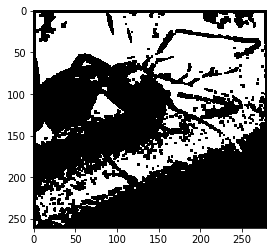

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# 画像をグレースケールで読み込み
img = cv2.imread('/content/gdrive/My Drive/前処理入門/data/ants/swiss-army-ant.jpg', 0)
# 2値化画像へ変換
ret, bin_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# 画像の収縮
kernel = np.ones((3,3), np.uint8)
img_el = cv2.erode(bin_img, kernel, iterations=1)
plt.imshow(img_el, cmap='gray')

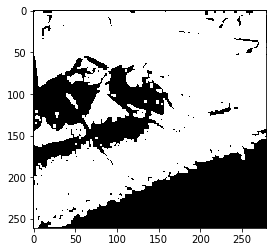

In [0]:
#膨張
img_dl=cv2.dilate(bin_img,kernel,iterations=1)
plt.imshow(img_dl,cmap='gray')

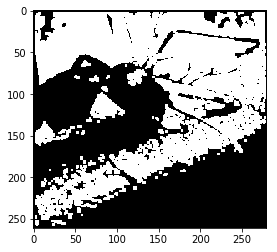

In [0]:
#オープニング
img_op=cv2.morphologyEx(bin_img,cv2.MORPH_OPEN,kernel)
plt.imshow(img_op,cmap='gray')

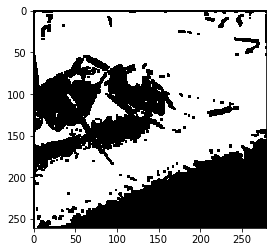

In [0]:
#クロージング
img_cl=cv2.morphologyEx(bin_img,cv2.MORPH_CLOSE,kernel)
plt.imshow(img_cl,cmap='gray')

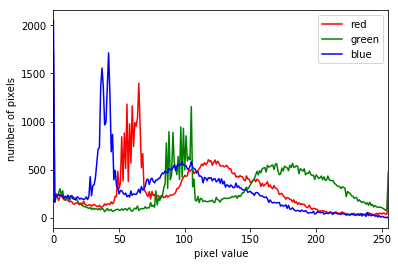

In [0]:
#2.3
# ヒストグラムの作成
img = cv2.imread('/content/gdrive/My Drive/前処理入門/data/ants/swiss-army-ant.jpg')
b,g,r=img[:,:,0],img[:,:,1],img[:,:,2]
#横軸にピクセル値、縦軸にそのピクセル値を持つピクセル数、ピーク=そのピクセル値を持つピクセル数が最多
hist_r, bins = np.histogram(r.ravel(), 256, [0,256])
hist_g, bins = np.histogram(g.ravel(), 256, [0,256])
hist_b, bins = np.histogram(b.ravel(), 256, [0,256])

# ヒストグラムの描画
plt.xlim(0, 255)
plt.plot(hist_r, '-r', label='red')
plt.plot(hist_g, '-g', label='green')
plt.plot(hist_b, '-b', label='blue')
plt.legend()
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.show()

In [0]:
#2.4 PCAによる次元圧縮

from sklearn.decomposition import PCA

# pixel_df = cv2.imread('/content/gdrive/My Drive/前処理入門/data/ants/swiss-army-ant.jpg',0)

pca=PCA(0.80)
pixels_pca=pca.fit_transform(pixels_df)

print(pca.n_components_)
print(pixels_pca.shape)

65
(397, 65)


In [0]:
# PCA適用後の説明変数と目的変数を結合
img_set_pca = pd.concat([pd.DataFrame(pixels_pca), labels_df], axis=1)
img_set_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,label
0,8.585932,-2.592704,1.296475,-0.270453,1.362006,-1.552697,-1.112306,-0.823676,0.730632,0.517815,-1.604642,2.242224,-0.692905,-0.073458,-3.031216,-1.873769,0.461056,0.973802,1.388130,0.395986,0.367717,-0.940651,0.120401,-0.397337,1.871570,0.128084,0.248577,-0.936363,0.454872,0.117142,-0.405579,-0.582939,-1.688844,0.445064,-0.570595,-0.238806,0.176667,0.413730,0.497701,-0.910149,0.123080,0.242355,-0.536888,0.364694,1.021485,-0.573779,0.041466,0.715833,0.554465,-0.083480,-0.303250,-0.533674,1.549966,-0.195377,0.307826,-0.149686,-0.717115,-0.392132,-0.452940,0.170282,0.083957,-0.227805,-0.098932,-0.030707,-0.464957,0
1,4.069253,0.381675,-0.552785,-0.935779,0.367428,-2.649944,0.885889,-4.170876,1.151914,0.372177,-2.098357,1.951163,-0.611007,0.395939,-2.003159,-0.120376,0.091503,0.962830,0.484828,0.349959,1.727307,1.563186,-0.450908,0.899174,0.165486,0.303072,-0.427310,-1.417842,0.769906,-0.436720,-0.055954,0.373794,-1.428619,0.823393,-0.771373,-1.356172,-0.144781,0.765005,0.592655,0.002928,-0.410046,-1.184822,0.840250,-0.184113,0.387268,-0.096807,-0.377388,-0.210046,-0.243729,0.649502,-0.450484,-0.454668,0.136705,0.570016,0.869048,-0.527554,0.811461,-0.162448,0.020792,0.253765,0.133841,0.306579,-0.188010,-0.052866,0.406416,0
2,-11.039748,9.327218,-6.492360,2.225735,-1.772062,-4.127972,0.479885,1.374374,7.333877,-3.644278,0.315921,-2.388961,-8.468476,-4.273054,1.053972,-2.360460,4.071903,0.017668,-2.627544,-5.204322,-1.804760,-1.858836,-1.186995,-0.525508,3.062789,-4.560392,-0.511489,0.309824,0.134836,0.754544,4.124149,-2.214460,-0.810859,1.897999,-0.795961,-0.964655,1.749068,2.907138,-0.651330,-0.714695,-0.343138,-1.811387,-2.083031,-0.270647,0.542907,1.447065,-0.510695,0.329797,0.643629,1.091530,-1.727006,0.308863,-1.323227,0.289935,-0.315253,-0.352567,-0.513663,-1.243589,-0.962760,0.785925,-0.467424,-1.097783,-0.152536,-1.193464,-0.206979,0
3,42.004818,-2.950135,-8.028556,-8.161433,-1.800311,6.361601,4.497587,-3.424305,6.002184,-3.423000,-4.032424,0.343847,0.326084,0.574998,2.659160,-4.278516,-1.779633,-1.442348,-0.634282,4.457839,-1.520121,-1.644272,-2.655890,-1.601444,0.834851,3.808105,0.597639,-3.359032,-2.556571,1.929059,-1.198451,1.075313,0.831006,-0.526549,-3.827438,0.245448,1.298994,0.320864,-2.283188,0.335097,0.163739,-1.018379,-0.568946,0.322668,0.769517,-1.975409,-1.716749,-1.893213,-0.000740,-0.453178,2.505558,-2.784242,-0.015035,-0.361623,-0.031854,0.995757,0.422420,-1.205339,-0.207441,-1.047376,-1.888064,0.338827,-0.047465,0.613203,-0.561086,0
4,31.880076,-6.093543,6.490104,8.356649,3.687303,-5.482400,-1.098567,2.470296,1.352513,0.514062,-1.049906,0.732452,-3.756899,-2.289956,-5.775924,2.276313,1.219922,0.266847,3.129028,0.551150,-2.854297,-3.040282,-1.781968,-0.001832,0.095880,-1.816729,-0.612284,-0.554278,-0.962692,3.329328,-1.606559,1.378516,0.171466,0.684730,0.585253,-0.961286,1.687353,2.930475,-1.386375,-1.129290,1.784927,0.241670,-0.884990,1.642602,-0.440405,2.707624,-0.341186,0.234687,-1.773803,-1.551570,-1.832367,-0.482653,0.833370,-0.789372,-0.345844,-0.563746,1.410570,0.039913,-0.730414,1.393114,0.829098,1.859050,1.778975,-0.940773,-1.131724,0


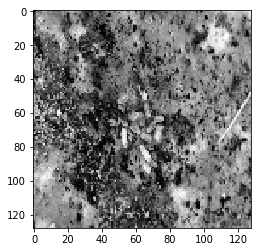

In [0]:
# 元の画像を描画
plt.imshow(np.array(pixels_df)[99].reshape(128, 128), cmap='gray')

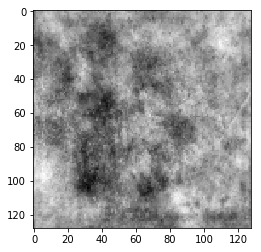

In [0]:
# 圧縮した画像を描画
pixels_low = pca.inverse_transform(pixels_pca)
plt.imshow(pixels_low[99].reshape(128, 128), cmap='gray')

In [0]:
#t-SNEによる次元圧縮
#データ間の距離を確率分布で表現する
#次元圧縮前後の確率分布のKL情報量が最小になる、圧縮後のデータ点を計算

from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)
pixels_tsne=tsne.fit_transform(pixels_df)

print(pixels_df.shape)
print(pixels_tsne.shape)

img_set_tsne=pd.concat([pd.DataFrame(pixels_tsne),labels_df],axis=1)
img_set_tsne.head()

(397, 16384)
(397, 2)


,0,1,label
0,-2.801507,-2.396383,0
1,-1.261468,-2.080330,0
2,2.725327,8.092463,0
3,-9.419638,-6.389343,0
4,-7.473162,-6.207748,0


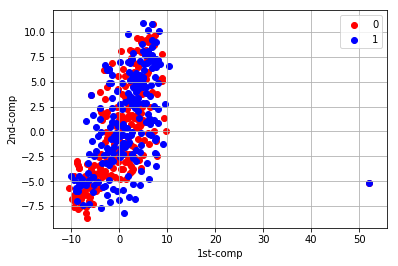

In [0]:
# 0の描画
img_set_tsne_0 = img_set_tsne[img_set_tsne['label'] == 0]
img_set_tsne_0 = img_set_tsne_0.drop('label', axis=1)
plt.scatter(img_set_tsne_0[0], img_set_tsne_0[1], c='red', label=0)
# 1の描画
img_set_tsne_1 = img_set_tsne[img_set_tsne['label'] == 1]
img_set_tsne_1 = img_set_tsne_1.drop('label', axis=1)
plt.scatter(img_set_tsne_1[0], img_set_tsne_1[1], c='blue', label=1)

plt.xlabel('1st-comp')
plt.ylabel('2nd-comp')
plt.legend()
plt.grid()
plt.show()